In [1]:
import pandas as pd
import numpy as np
import csv
import json
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import math


5482
4059
1792
800
531
339
308
189
164
150
78
58
56
45
39
25
13
10


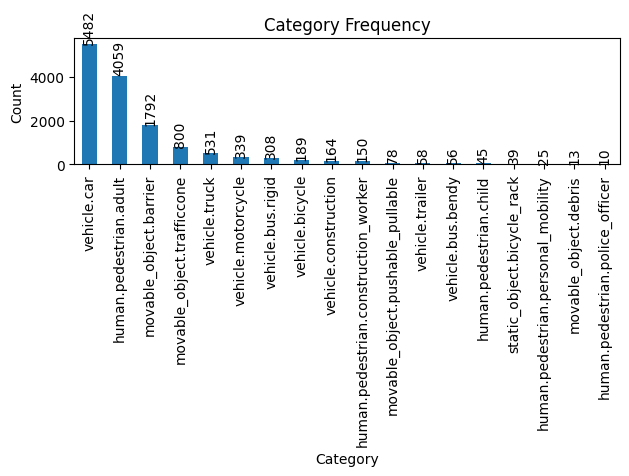

In [2]:
# 'Lidar_Points','box','anno_token','number_points' ,'Category'
df = pd.read_csv('point_cloud.csv')
df_preprocess = pd.DataFrame()
category_counts = df["Category"].value_counts()
fig, ax = plt.subplots()
category_counts.plot(kind='bar', ax=ax)

# Add labels to the bars
for i, v in enumerate(category_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', rotation=90)
    print(v)

# Add axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [3]:
df["Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0            human.pedestrian.adult
1            human.pedestrian.adult
2                       vehicle.car
3            human.pedestrian.adult
4        movable_object.trafficcone
                    ...            
14133                   vehicle.car
14134        human.pedestrian.adult
14135                   vehicle.car
14136        human.pedestrian.adult
14137        human.pedestrian.adult
Name: Category, Length: 14138, dtype: object>

In [4]:
# covert Lidar_Points from tring to list
Lidar_Points_list = list()
for i in range (0,len(df)):
    Lidar_Points_list.append((np.array(eval(df['Lidar_Points'][i]))))

df_preprocess['Lidar_Points'] = np.array(Lidar_Points_list)

/tmp/ipykernel_34983/1458397522.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_preprocess['Lidar_Points'] = np.array(Lidar_Points_list)


In [5]:
print(type(df_preprocess['Lidar_Points'].values))
print(df_preprocess['Lidar_Points'].values)

<class 'numpy.ndarray'>
[array([[1.86473484e+01, 5.95536423e+01, 5.03778346e-02, 3.50000000e+01]])
 array([[2.09373226e+01, 3.60542336e+01, 2.66038571e-02, 3.80000000e+01],
        [2.12292881e+01, 3.60610352e+01, 2.66163666e-02, 2.20000000e+01]])
 array([[3.62825165e+01, 6.35721893e+01, 5.40391840e-02, 2.30000000e+01],
        [3.77132721e+01, 6.34745789e+01, 5.39390594e-02, 2.40000000e+01],
        [3.81878548e+01, 6.34369049e+01, 5.39019220e-02, 2.40000000e+01],
        [3.86871033e+01, 6.34351883e+01, 5.39010540e-02, 2.40000000e+01],
        [3.92332840e+01, 6.34791946e+01, 5.39478660e-02, 2.40000000e+01]])
 ... array([[ 7.16727877, -4.05340576, -1.7502439 ,  1.        ],
            [ 7.11083221, -4.07732677, -1.74234009,  1.        ],
            [ 7.00958776, -4.02251148, -1.52272856, 29.        ],
            ...,
            [ 7.40178108, -8.08609676, -1.5407635 ,  2.        ],
            [ 7.51343155, -8.29780006, -1.83922029,  5.        ],
            [ 7.51319265, -8.30330

In [6]:
print(type(df_preprocess['Lidar_Points'][0]))
print(df_preprocess['Lidar_Points'][0])

<class 'numpy.ndarray'>
[[1.86473484e+01 5.95536423e+01 5.03778346e-02 3.50000000e+01]]


In [7]:
string = df['Lidar_Points'][1]
my_list = eval(string)

print(my_list)


[[20.93732261657715, 36.05423355102539, 0.026603857055306435, 38.0], [21.22928810119629, 36.06103515625, 0.02661636658012867, 22.0]]


In [8]:
#print one sample of Lidar_Points
print(df_preprocess['Lidar_Points'][55])
print(type(df_preprocess['Lidar_Points'][55]))
df_preprocess.head(5)

[[-3.04158711 16.40598679 -0.38882875  1.        ]
 [-2.88632774 16.59400558 -1.19511521 45.        ]
 [-2.86258292 16.48949051 -0.78989822  0.        ]
 [-2.85062289 16.436306   -0.38870379  2.        ]
 [-2.78639269 16.61518669 -1.19537199 52.        ]
 [-2.68364286 16.59984589 -1.19315588 38.        ]
 [-2.66735291 16.5344944  -0.79040933  2.        ]
 [-2.6512177  16.46978188 -0.38866803  2.        ]
 [-2.59083414 16.66717148 -1.19671154 13.        ]]
<class 'numpy.ndarray'>


Lidar_Points
0  [[18.647348403930664, 59.55364227294922, 0.050...
1  [[20.93732261657715, 36.05423355102539, 0.0266...
2  [[36.28251647949219, 63.57218933105469, 0.0540...
3  [[25.23015022277832, 32.13444900512695, -0.930...
4  [[6.653696537017822, -15.351180076599121, -1.9...

In [9]:
# print one sample of box column
print(df['box'][99])

[label: nan, score: nan, xyz: [9.84, 41.74, 0.14], wlh: [1.84, 0.68, 0.89], rot axis: [-0.01, 0.02, -1.00], ang(degrees): -178.71, ang(rad): -3.12, vel: nan, nan, nan, name: movable_object.barrier, token: bb732bdb7db44e988f601e86a507bad9]


In [10]:
# parse xyz
xyz_list = list()
for input_string in df['box']:
    match = re.search(r'xyz:\s*\[([-0-9.,\s]+)\]', input_string)
    if match:
        coordinates = match.group(1).split(',')
        xyz_list.append([float(coord.strip()) for coord in coordinates])

x_list = list()
y_list = list()
z_list = list()

for xyz in xyz_list:
    x_list.append(xyz[0])
    y_list.append(xyz[1])
    z_list.append(xyz[2])

df_preprocess['x'] = x_list
df_preprocess['y'] = y_list
df_preprocess['z'] = z_list

In [11]:
#print one sample of Lidar_Points
df_preprocess.head(5)

Lidar_Points      x      y     z
0  [[18.647348403930664, 59.55364227294922, 0.050...  18.41  59.52  0.77
1  [[20.93732261657715, 36.05423355102539, 0.0266...  21.00  36.06 -0.03
2  [[36.28251647949219, 63.57218933105469, 0.0540...  37.35  64.40  0.45
3  [[25.23015022277832, 32.13444900512695, -0.930...  25.37  32.17 -0.16
4  [[6.653696537017822, -15.351180076599121, -1.9...   6.63 -15.39 -1.82

In [12]:
# parse wlh
wlh_list = list()
for input_string in df['box']:
    match = re.search(r'wlh:\s*\[([-0-9.,\s]+)\]', input_string)
    if match:
        coordinates = match.group(1).split(',')
        wlh_list.append([float(coord.strip()) for coord in coordinates])

w_list = list()
l_list = list()
h_list = list()

for wlh in wlh_list:
    w_list.append(wlh[0])
    l_list.append(wlh[1])
    h_list.append(wlh[2])

df_preprocess['w'] = w_list
df_preprocess['l'] = l_list
df_preprocess['h'] = h_list

In [13]:
#print one sample of Lidar_Points
df_preprocess.head(5)

Lidar_Points      x      y     z  \
0  [[18.647348403930664, 59.55364227294922, 0.050...  18.41  59.52  0.77   
1  [[20.93732261657715, 36.05423355102539, 0.0266...  21.00  36.06 -0.03   
2  [[36.28251647949219, 63.57218933105469, 0.0540...  37.35  64.40  0.45   
3  [[25.23015022277832, 32.13444900512695, -0.930...  25.37  32.17 -0.16   
4  [[6.653696537017822, -15.351180076599121, -1.9...   6.63 -15.39 -1.82   

      w     l     h  
0  0.62  0.67  1.64  
1  0.78  0.77  1.71  
2  2.01  4.63  1.57  
3  0.75  0.82  1.64  
4  0.43  0.36  0.79

In [14]:
# parse rot_axis
rot_axis_list = list()
for input_string in df['box']:
    match = re.search(r'rot axis:\s*\[([-0-9.,\s]+)\]', input_string)
    if match:
        coordinates = match.group(1).split(',')
        rot_axis_list.append([float(coord.strip()) for coord in coordinates])

rx_list = list()
ry_list = list()
rz_list = list()

for rot_axis in rot_axis_list:
    rx_list.append(rot_axis[0])
    ry_list.append(rot_axis[1])
    rz_list.append(rot_axis[2])

df_preprocess['rx'] = rx_list
df_preprocess['ry'] = ry_list
df_preprocess['rz'] = rz_list

In [15]:
#print one sample of Lidar_Points
df_preprocess.head(5)

Lidar_Points      x      y     z  \
0  [[18.647348403930664, 59.55364227294922, 0.050...  18.41  59.52  0.77   
1  [[20.93732261657715, 36.05423355102539, 0.0266...  21.00  36.06 -0.03   
2  [[36.28251647949219, 63.57218933105469, 0.0540...  37.35  64.40  0.45   
3  [[25.23015022277832, 32.13444900512695, -0.930...  25.37  32.17 -0.16   
4  [[6.653696537017822, -15.351180076599121, -1.9...   6.63 -15.39 -1.82   

      w     l     h    rx    ry   rz  
0  0.62  0.67  1.64  0.01 -0.02  1.0  
1  0.78  0.77  1.71 -0.03  0.01 -1.0  
2  2.01  4.63  1.57  0.01 -0.02  1.0  
3  0.75  0.82  1.64 -0.01 -0.02  1.0  
4  0.43  0.36  0.79 -0.03  0.01 -1.0

In [16]:
# parse ang_degrees
ang_degrees_list = list()
for input_string in df['box']:
    match = re.search(r'ang\(degrees\):\s*([-0-9.]+)', input_string)
    if match:
        ang_degrees_list.append(float(match.group(1)))

df_preprocess['ang_degrees'] = ang_degrees_list


In [17]:
#print one sample of Lidar_Points
df_preprocess.head(5)

Lidar_Points      x      y     z  \
0  [[18.647348403930664, 59.55364227294922, 0.050...  18.41  59.52  0.77   
1  [[20.93732261657715, 36.05423355102539, 0.0266...  21.00  36.06 -0.03   
2  [[36.28251647949219, 63.57218933105469, 0.0540...  37.35  64.40  0.45   
3  [[25.23015022277832, 32.13444900512695, -0.930...  25.37  32.17 -0.16   
4  [[6.653696537017822, -15.351180076599121, -1.9...   6.63 -15.39 -1.82   

      w     l     h    rx    ry   rz  ang_degrees  
0  0.62  0.67  1.64  0.01 -0.02  1.0       179.02  
1  0.78  0.77  1.71 -0.03  0.01 -1.0       -87.24  
2  2.01  4.63  1.57  0.01 -0.02  1.0       176.99  
3  0.75  0.82  1.64 -0.01 -0.02  1.0       -95.14  
4  0.43  0.36  0.79 -0.03  0.01 -1.0       -84.07

In [18]:
#parse labels
#Pedesterian  = 1 
#non_Pedesterian = 0

label_list = list()
for cat in df['Category']:
    if cat.startswith("human.pedestrian") :
        label_list.append(1) # 1 -> Pedesterian
    else:
        label_list.append(0) # 0 -> Others
df_preprocess['label'] = label_list



In [19]:
df_preprocess['label'].value_counts()

0    9849
1    4289
Name: label, dtype: int64

In [20]:
#print one sample of Lidar_Points
df_preprocess.head(5)


Lidar_Points      x      y     z  \
0  [[18.647348403930664, 59.55364227294922, 0.050...  18.41  59.52  0.77   
1  [[20.93732261657715, 36.05423355102539, 0.0266...  21.00  36.06 -0.03   
2  [[36.28251647949219, 63.57218933105469, 0.0540...  37.35  64.40  0.45   
3  [[25.23015022277832, 32.13444900512695, -0.930...  25.37  32.17 -0.16   
4  [[6.653696537017822, -15.351180076599121, -1.9...   6.63 -15.39 -1.82   

      w     l     h    rx    ry   rz  ang_degrees  label  
0  0.62  0.67  1.64  0.01 -0.02  1.0       179.02      1  
1  0.78  0.77  1.71 -0.03  0.01 -1.0       -87.24      1  
2  2.01  4.63  1.57  0.01 -0.02  1.0       176.99      0  
3  0.75  0.82  1.64 -0.01 -0.02  1.0       -95.14      1  
4  0.43  0.36  0.79 -0.03  0.01 -1.0       -84.07      0

In [21]:
points_number_list = list()
for points_number in df['number_points']:
    points_number_list.append(points_number)
df_preprocess['points_number'] = points_number_list

In [22]:
df_preprocess['Distance'] = np.sqrt(df_preprocess['x']**2 +
                                    df_preprocess['y']**2 +
                                    df_preprocess['z']**2)
df_preprocess['Distance'].describe()

count    14138.000000
mean        27.796621
std         16.512075
min          2.525173
25%         15.607716
50%         24.336100
75%         36.246836
max        109.756267
Name: Distance, dtype: float64

In [23]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label,points_number,Distance
cat_list =['Distance']


for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df_preprocess[cat].hist(bins=30,color='c',edgecolor='k')
    plt.axvline(df_preprocess[cat].mean(), color='r', linewidth=3, label='Mean')
    plt.axvline(df_preprocess[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel(cat)
    plt.ylabel('Number of Applicants')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_preprocess[cat], orient='v', width=0.2)
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df_preprocess[cat], orient='v', width=0.5)
    
    plt.show()

/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


In [24]:
num_categories = df_preprocess['label'].value_counts()
print(num_categories)

0    9849
1    4289
Name: label, dtype: int64


In [25]:
Min_Points = 4
df_preprocess = df_preprocess[df_preprocess['Lidar_Points'].apply(lambda x: len(x) >= Min_Points)]
df_preprocess = df_preprocess.reset_index(drop=True)

In [26]:
#print one sample of Lidar_Points
df_preprocess.describe()

x            y            z            w            l  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000   
mean      4.760819    -0.056710    -0.868130     1.616402     3.157288   
std      13.853665    20.760919     0.955652     0.774794     2.738110   
min     -58.100000  -100.480000    -5.220000     0.280000     0.300000   
25%      -5.180000   -13.380000    -1.410000     0.720000     0.690000   
50%       5.790000    -0.070000    -0.980000     1.840000     4.030000   
75%      13.100000    13.340000    -0.410000     2.040000     4.730000   
max      65.110000   102.350000     6.580000     4.740000    14.460000   

                 h           rx           ry           rz  ang_degrees  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000   
mean      1.709036     0.001982     0.002359    -0.061314   -31.777698   
std       0.614926     0.189309     0.096377     0.975894   104.559952   
min       0.460000    -0.980000    -0.890000    -1.000000  -179.990000   
25%       1.490000    -0.020000    -0.020000    -1.000000   -98.080000   
50%       1.670000     0.000000     0.000000    -0.880000   -60.910000   
75%       1.830000     0.020000     0.030000     1.000000    34.990000   
max       4.590000     1.000000     0.770000     1.000000   179.990000   

             label  points_number     Distance  
count  9461.000000    9461.000000  9461.000000  
mean      0.259275     106.466018    22.001337  
std       0.438260     505.992955    12.773715  
min       0.000000       4.000000     2.525173  
25%       0.000000       7.000000    12.596563  
50%       0.000000      16.000000    19.516531  
75%       1.000000      48.000000    27.683065  
max       1.000000   10019.000000   108.821574

In [27]:
num_categories = df_preprocess['label'].value_counts()

print(num_categories)

0    7008
1    2453
Name: label, dtype: int64


In [28]:
#save preprocess to csv
df_preprocess.to_csv('preprocess.csv', index=False)

In [29]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label
df_read = pd.read_csv('preprocess.csv')
df_read.head()
print(df_read['label'][0])
print(type(df_read['label'][0]))



0
<class 'numpy.int64'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


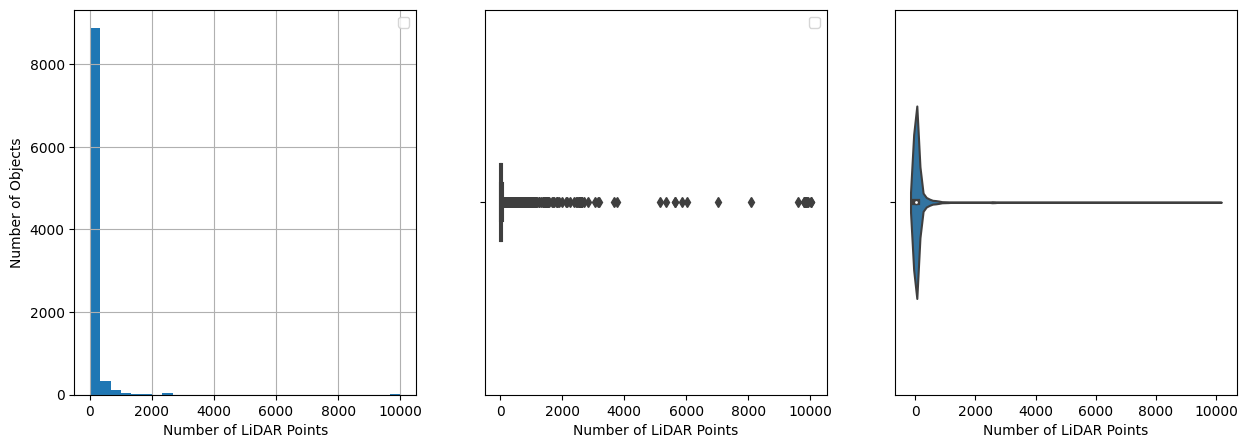

In [30]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label,points_number
cat_list =['points_number']


for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df_preprocess[cat].hist(bins=30)#,color='c',edgecolor='k')
    #plt.axvline(df_preprocess[cat].mean(), color='r', linewidth=3, label='Mean')
    #plt.axvline(df_preprocess[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel('Number of LiDAR Points')
    plt.ylabel('Number of Objects')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_preprocess[cat], orient='v', width=0.2)
    plt.xlabel('Number of LiDAR Points')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df_preprocess[cat], orient='v', width=0.5)
    plt.xlabel('Number of LiDAR Points')
    
    plt.show()

In [31]:
df_preprocess['points_number'].describe()


count     9461.000000
mean       106.466018
std        505.992955
min          4.000000
25%          7.000000
50%         16.000000
75%         48.000000
max      10019.000000
Name: points_number, dtype: float64

In [32]:
#df_preprocess = df_preprocess[df_preprocess['points_number'] <= 64]
#(df_preprocess["Lidar_Points"][3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


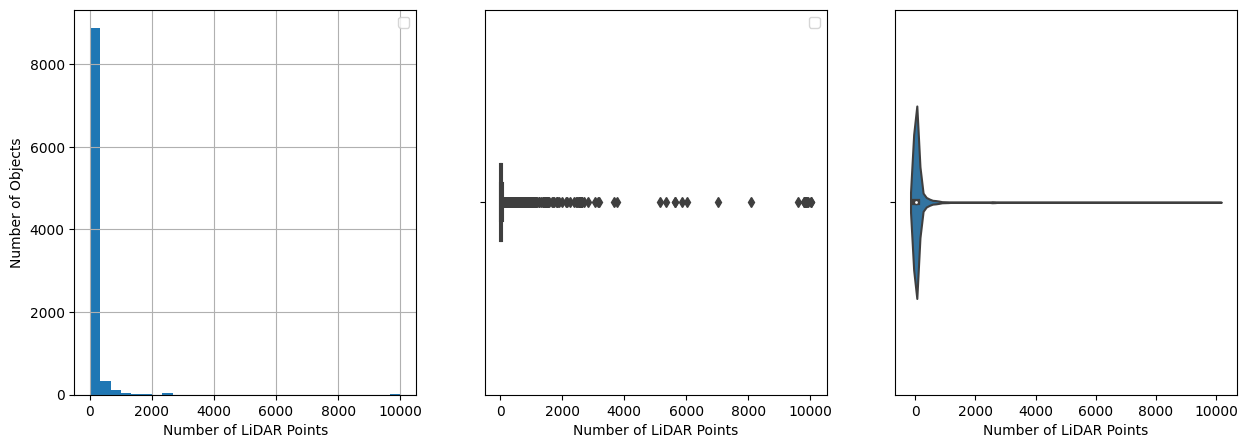

In [33]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label,points_number
cat_list =['points_number']


for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df_preprocess[cat].hist(bins=30)#,color='c',edgecolor='k')
    #plt.axvline(df_preprocess[cat].mean(), color='r', linewidth=3, label='Mean')
    #plt.axvline(df_preprocess[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel('Number of LiDAR Points')
    plt.ylabel('Number of Objects')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_preprocess[cat], orient='v', width=0.2)
    plt.xlabel('Number of LiDAR Points')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df_preprocess[cat], orient='v', width=0.5)
    plt.xlabel('Number of LiDAR Points')
    
    plt.show()

In [34]:
df_preprocess['points_number'].describe()


count     9461.000000
mean       106.466018
std        505.992955
min          4.000000
25%          7.000000
50%         16.000000
75%         48.000000
max      10019.000000
Name: points_number, dtype: float64

In [35]:
num_categories = df_preprocess['label'].value_counts()

print(num_categories)

0    7008
1    2453
Name: label, dtype: int64


In [36]:
df_preprocess = df_preprocess.reset_index(drop=True)
zeropad_list = np.array((0,0,0,0))
print(len(df_preprocess))
for i in range(0,len(df_preprocess)):
    lst = list()
    
    for j in range(0,len(df_preprocess["Lidar_Points"][i])):
        lst.append(df_preprocess["Lidar_Points"][i][j])

    for j in range(len(df_preprocess["Lidar_Points"][i]),64):
        lst.append(zeropad_list)
    df_preprocess.at[i, 'Lidar_Points'] = np.array(lst)
    df_preprocess.at[i, 'points_number'] = len(df_preprocess['Lidar_Points'][i])


print(df_preprocess["Lidar_Points"][0])

9461
[[3.62825165e+01 6.35721893e+01 5.40391840e-02 2.30000000e+01]
 [3.77132721e+01 6.34745789e+01 5.39390594e-02 2.40000000e+01]
 [3.81878548e+01 6.34369049e+01 5.39019220e-02 2.40000000e+01]
 [3.86871033e+01 6.34351883e+01 5.39010540e-02 2.40000000e+01]
 [3.92332840e+01 6.34791946e+01 5.39478660e-02 2.40000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0

In [37]:
df_preprocess = df_preprocess[df_preprocess['points_number'] <= 64]
df_preprocess = df_preprocess.reset_index(drop=True)

(df_preprocess["Lidar_Points"][3])

array([[ -1.2798208 , -14.91492939,  -1.04773009,  70.        ],
       [ -1.28866065, -14.98660946,  -0.70489824,   7.        ],
       [ -1.35786593, -14.85719967,  -1.39036274,  40.        ],
       [ -1.36269391, -14.88106918,  -1.04588258,  54.        ],
       [ -1.44110405, -14.93893909,  -2.10287523,  23.        ],
       [ -1.45501149, -14.9735775 ,  -1.40208316,  39.        ],
       [ -1.5315249 , -14.95333767,  -2.10619688,  21.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


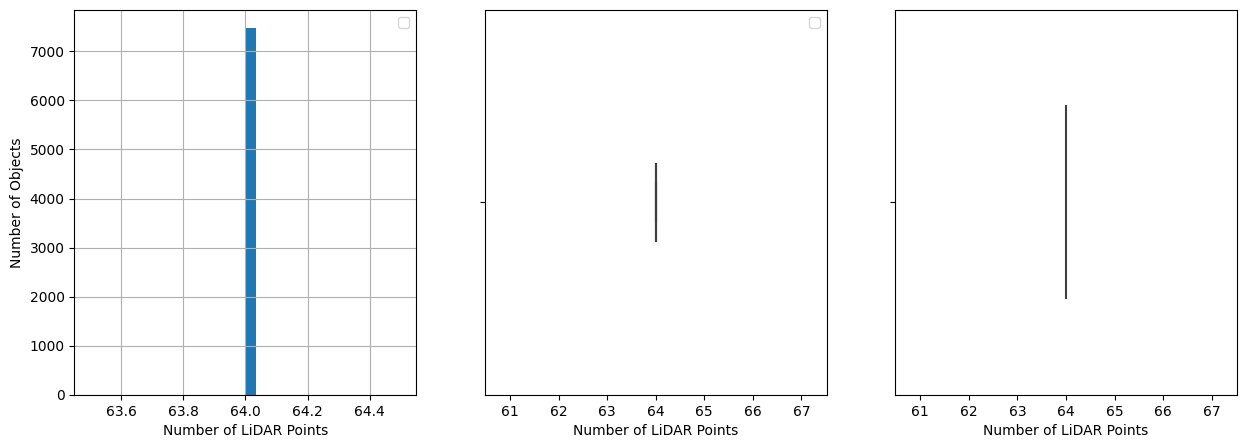

In [38]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label,points_number
cat_list =['points_number']


for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df_preprocess[cat].hist(bins=30)#,color='c',edgecolor='k')
    #plt.axvline(df_preprocess[cat].mean(), color='r', linewidth=3, label='Mean')
    #plt.axvline(df_preprocess[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel('Number of LiDAR Points')
    plt.ylabel('Number of Objects')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_preprocess[cat], orient='v', width=0.2)
    plt.xlabel('Number of LiDAR Points')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df_preprocess[cat], orient='v', width=0.5)
    plt.xlabel('Number of LiDAR Points')
    
    plt.show()

In [39]:
df_preprocess['label'].value_counts()


0    5100
1    2376
Name: label, dtype: int64

/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mabdalla/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


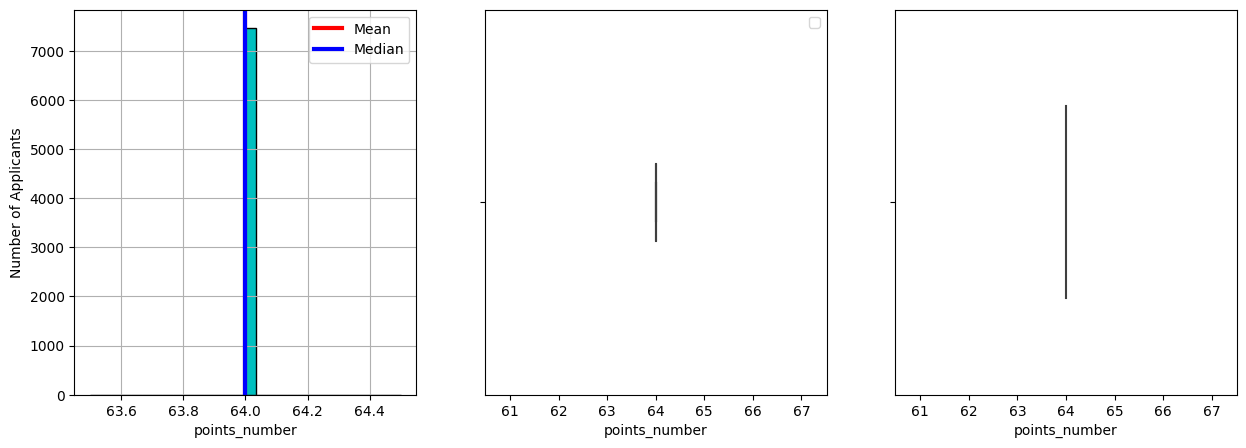

In [40]:
# Lidar_Points,x,y,z,w,l,h,rx,ry,rz,ang_degrees,label,points_number
cat_list =['points_number']


for cat in cat_list:
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df_preprocess[cat].hist(bins=30,color='c',edgecolor='k')
    plt.axvline(df_preprocess[cat].mean(), color='r', linewidth=3, label='Mean')
    plt.axvline(df_preprocess[cat].median(), color='b',linewidth=3, label='Median')
    plt.xlabel(cat)
    plt.ylabel('Number of Applicants')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df_preprocess[cat], orient='v', width=0.2)
    plt.legend()
    
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df_preprocess[cat], orient='v', width=0.5)
    
    plt.show()

In [41]:
df_preprocess.describe()

x            y            z            w            l  \
count  7476.000000  7476.000000  7476.000000  7476.000000  7476.000000   
mean      5.125532    -0.034908    -0.874032     1.516766     2.652703   
std      14.923031    22.711417     1.031381     0.805973     2.445731   
min     -58.100000  -100.480000    -5.220000     0.280000     0.300000   
25%      -5.692500   -15.932500    -1.500000     0.670000     0.650000   
50%       6.535000     0.140000    -0.980000     1.790000     0.990000   
75%      14.332500    16.390000    -0.350000     2.020000     4.580000   
max      65.110000   102.350000     6.580000     4.740000    14.460000   

                 h           rx           ry           rz  ang_degrees  \
count  7476.000000  7476.000000  7476.000000  7476.000000  7476.000000   
mean      1.627339     0.002501     0.002195    -0.108719   -28.510873   
std       0.513241     0.196396     0.099182     0.970058   104.444241   
min       0.460000    -0.980000    -0.890000    -1.000000  -179.990000   
25%       1.430000    -0.020000    -0.020000    -1.000000   -95.320000   
50%       1.660000    -0.000000    -0.000000    -0.960000   -52.445000   
75%       1.790000     0.020000     0.030000     1.000000    20.672500   
max       4.590000     1.000000     0.770000     1.000000   179.990000   

             label  points_number     Distance  
count  7476.000000         7476.0  7476.000000  
mean      0.317817           64.0    24.472213  
std       0.465659            0.0    12.947570  
min       0.000000           64.0     2.525173  
25%       0.000000           64.0    15.790472  
50%       0.000000           64.0    22.179339  
75%       1.000000           64.0    30.029899  
max       1.000000           64.0   108.821574

In [42]:
for i in range(1,2):#len(df_preprocess['points_number'])):
    #print(df_preprocess['Lidar_Points'][i])
    origin = np.array([df_preprocess['x'][i],df_preprocess['y'][i],df_preprocess['z'][i],0])
    #print(df_preprocess['Lidar_Points'][i]-origin)
    df_preprocess.at[i, 'Lidar_Points'] = df_preprocess['Lidar_Points'][i]-origin

In [43]:
import pandas as pd

# Create a sample DataFrame
data = {'Col1': [1, 2, 3], 'Col2': [4, 5, 6]}
df = pd.DataFrame(data)

# Update a specific cell value using the .at[] accessor
df.at[0, 'Col2'] = 66

print(df)


   Col1  Col2
0     1    66
1     2     5
2     3     6


In [44]:
"""
Title: Point cloud classification with PointNet
"""



import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV


tf.random.set_seed(1234)

X = df_preprocess['Lidar_Points']
y = df_preprocess['label']

X_List = list()
for points in X:
    X_List.append(points)



X_train, X_test, y_train, y_test = train_test_split(X_List, y, test_size=0.4, shuffle=True ,stratify=y)

X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True ,stratify=y_test)



NUM_POINTS = 64
NUM_CLASSES = 2
BATCH_SIZE = 32

train_points = X_train
test_points = X_test
validate_points = X_validate
train_labels = y_train
test_labels = y_test
validate_labels = y_validate
#
#print(len(train_points))
#print(type(train_points))
#print((train_points))
#
#print(type(train_points[0]))
#print(len(train_points[0]))
#print((train_points[0]))


"""
Our data can now be read into a `tf.data.Dataset()` object. We set the shuffle buffer
size to the entire size of the dataset as prior to this the data is ordered by class.
Data augmentation is important when working with point cloud data. We create a
augmentation function to jitter and shuffle the train dataset.
"""


def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))
validate_dataset = tf.data.Dataset.from_tensor_slices((validate_points, validate_labels))
train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)
validate_dataset = validate_dataset.shuffle(len(validate_points)).batch(BATCH_SIZE)

"""
### Build a model

Each convolution and fully-connected layer (with exception for end layers) consits of
Convolution / Dense -> Batch Normalization -> ReLU Activation.
"""


def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


"""
PointNet consists of two core components. The primary MLP network, and the transformer
net (T-net). The T-net aims to learn an affine transformation matrix by its own mini
network. The T-net is used twice. The first time to transform the input features (n, 3)
into a canonical representation. The second is an affine transformation for alignment in
feature space (n, 3). As per the original paper we constrain the transformation to be
close to an orthogonal matrix (i.e. ||X*X^T - I|| = 0).
"""


class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))


"""
 We can then define a general function to build T-net layers.
"""


def tnet(inputs, num_features):
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])


"""
The main network can be then implemented in the same manner where the t-net mini models
can be dropped in a layers in the graph. Here we replicate the network architecture
published in the original paper but with half the number of weights at each layer as we
are using the smaller 10 class ModelNet dataset.
"""

inputs = keras.Input(shape=(NUM_POINTS, 4))

x = tnet(inputs, 4)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

"""
### Train model

Once the model is defined it can be trained like any other standard classification model
using `.compile()` and `.fit()`.
"""

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy","mse"],
)
n_epochs = 100
history = model.fit(train_dataset, epochs=n_epochs, validation_data=validate_dataset)





2023-08-05 10:47:49.955769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 10:47:54.276364: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:
2023-08-05 10:47:54.276652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:
2023-08-05 10:47:54.276679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] 

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 4)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 64, 32)       160         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 32)      128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 64, 32)       0           ['batch_normalization[0][0

In [45]:
model.save_weights('model_weights.h5')
#new_model.load_weights('model_weights.h5')

tf.Tensor(
[[[ 9.45336914e+00  1.69335499e+01 -6.65504765e-03  0.00000000e+00]
  [ 9.46173096e+00  1.69343662e+01  4.47114050e-01  3.00000000e+00]
  [ 9.59081078e+00  1.69565048e+01 -4.62360859e-01  2.10000000e+01]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 2.63893013e+01 -3.21394897e+00 -1.23864841e+00  4.00000000e+00]
  [ 2.80007381e+01 -3.40781665e+00 -6.53684855e-01  3.00000000e+00]
  [ 2.62916031e+01 -3.36057448e+00 -1.23492575e+00  1.70000000e+01]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-8.94930744e+00  2.15417118e+01 -1.08824742e+00  1.00000000e+00]
  [-9.15379715e+00  2.20554790e+01 -5.54855645e-01  4.00000000e+00]
  [-9.18313885e+00  2

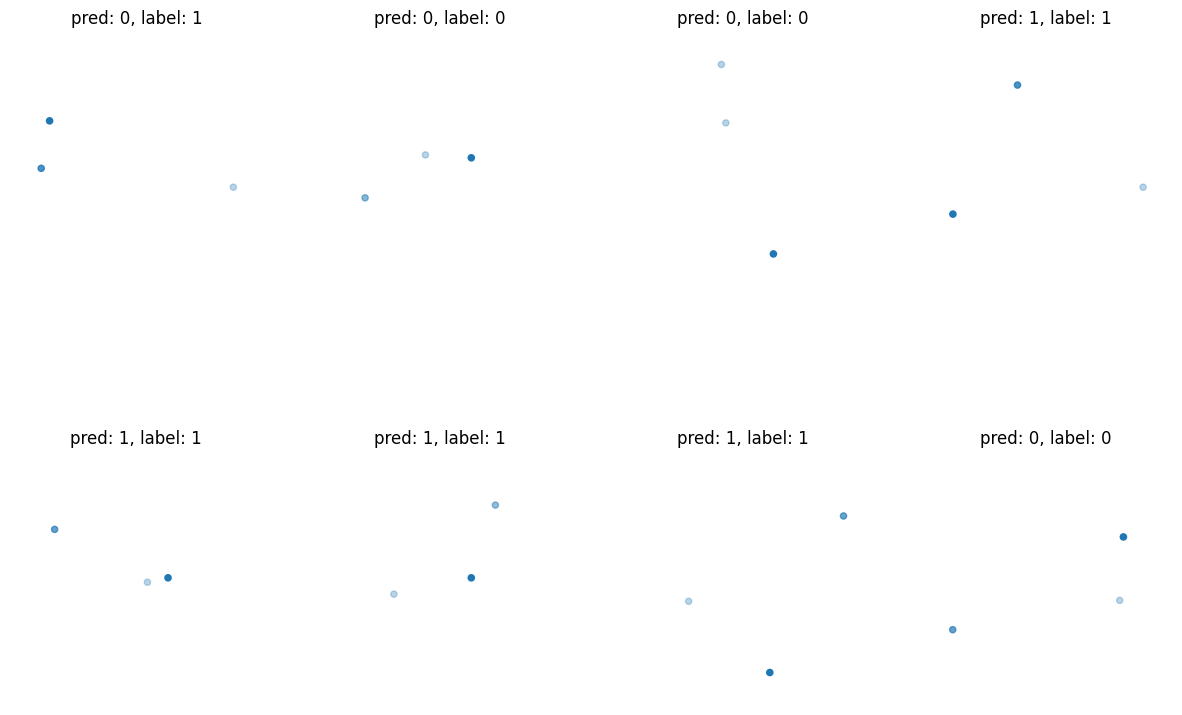

In [46]:
"""
## Visualize predictions

We can use matplotlib to visualize our trained model performance.
"""

data = test_dataset.take(10)
points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

print(points)

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()
# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :3, 0], points[i, :3, 1], points[i, :3, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            preds[i].numpy(), labels.numpy()[i]
        )
    )
    ax.set_axis_off()
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

data = test_dataset

all_points ,all_labels= list(data)[0]

for i in range(1,len(data)):
    points, labels = list(data)[i]
    all_points = tf.concat([all_points, points], axis=0)
    all_labels = tf.concat([all_labels, labels], axis=0)

print(len(all_labels))
y_true = all_labels

y_pred = model.predict(all_points)
y_pred = tf.math.argmax(y_pred, -1)

# Assuming y_true contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion)




1496
47/47 [==============================] - 1s 31ms/step
Accuracy: 0.8495989304812834
Precision: 0.7028112449799196
Recall: 0.819672131147541
F1 Score: 0.7567567567567569
ROC AUC Score: 0.8406124921406555
Confusion Matrix:
[[921 148]
 [ 77 350]]


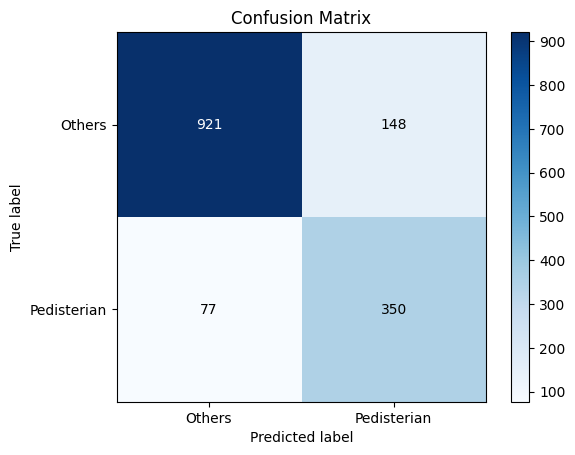

In [48]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
im = ax.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)

# Customize the plot
ax.set(xticks=np.arange(confusion.shape[1]),
       yticks=np.arange(confusion.shape[0]),
       xticklabels=['Others', 'Pedisterian'],
       yticklabels=['Others', 'Pedisterian'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Add colorbar
plt.colorbar(im)

# Loop over data dimensions and create text annotations
thresh = confusion.max() / 2.
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(j, i, format(confusion[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion[i, j] > thresh else "black")

# Display the plot
plt.show()


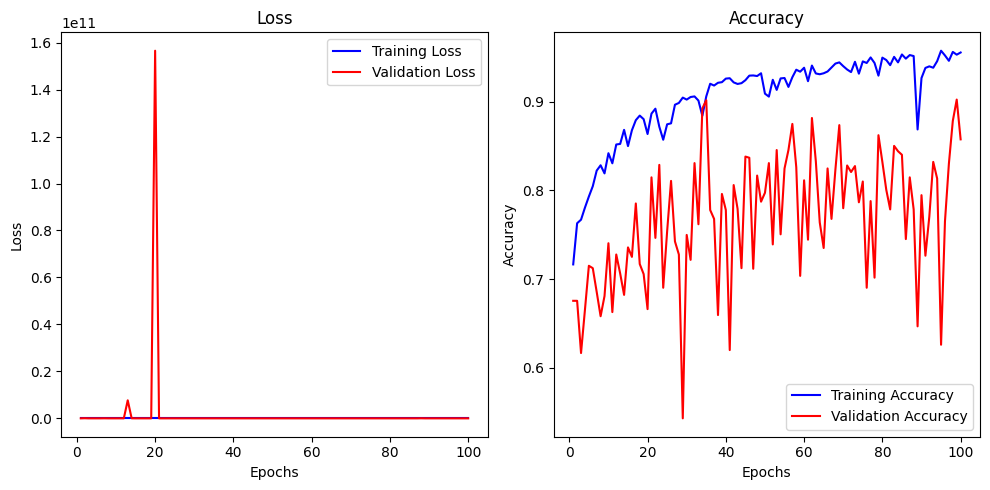

In [49]:
training_accuracy = history.history['sparse_categorical_accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_sparse_categorical_accuracy']
validation_loss = history.history['val_loss']
epochs = list()
for i in range (1,n_epochs+1):
    epochs.append(i)
# Plotting
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


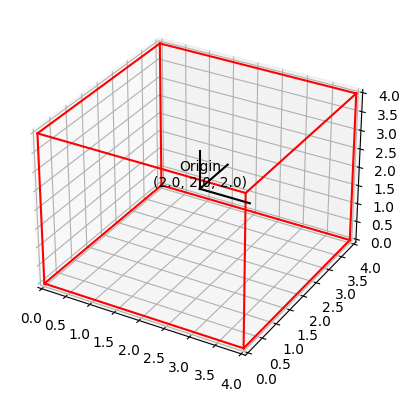

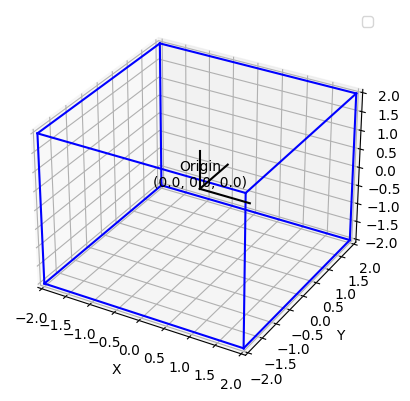

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_cube_transformation(vertices, vertices_new):
    # Plot the original cube
    plot_cube(vertices, color='red', label='Original Cube')

    # Plot the transformed cube
    plot_cube(vertices_new, color='blue')#, label='Transformed Cube')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.title('Cube Transformation')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

def plot_cube(vertices, **kwargs):
    # Define the edges of the cube
    edges = [
        [vertices[0], vertices[1]],
        [vertices[1], vertices[2]],
        [vertices[2], vertices[3]],
        [vertices[3], vertices[0]],
        [vertices[4], vertices[5]],
        [vertices[5], vertices[6]],
        [vertices[6], vertices[7]],
        [vertices[7], vertices[4]],
        [vertices[0], vertices[4]],
        [vertices[1], vertices[5]],
        [vertices[2], vertices[6]],
        [vertices[3], vertices[7]]
    ]

    # Calculate the center point of the cube
    center = np.mean(vertices, axis=0)

    # Create a new figure and axis for 3D plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the edges of the cube
    for edge in edges:
        ax.plot(*zip(*edge), **kwargs)

    # Set the new origin as the center point
    ax.set_xlim3d(center[0] - 2, center[0] + 2)
    ax.set_ylim3d(center[1] - 2, center[1] + 2)
    ax.set_zlim3d(center[2] - 2, center[2] + 2)

    # Draw coordinate axes at the origin
    ax.plot([center[0], center[0] + 1], [center[1], center[1]], [center[2], center[2]], color='black')
    ax.plot([center[0], center[0]], [center[1], center[1] + 1], [center[2], center[2]], color='black')
    ax.plot([center[0], center[0]], [center[1], center[1]], [center[2], center[2] + 1], color='black')

    # Add text annotations for the origin coordinates
    ax.text(center[0], center[1], center[2], 'Origin\n({:.1f}, {:.1f}, {:.1f})'.format(center[0], center[1], center[2]), ha='center', va='bottom', color='black')

def transform_cube(vertices):
    # Translate the cube to have the new origin at (1, 1, 1)
    vertices_new = vertices - np.array([2, 2, 2])

    return vertices_new

# Example usage
vertices = np.array([
    [0, 0, 0], [4, 0, 0], [4, 4, 0], [0, 4, 0],          # Bottom face
    [0, 0, 4], [4, 0, 4], [4, 4, 4], [0, 4, 4]           # Top face
])

vertices_new = transform_cube(vertices)

visualize_cube_transformation(vertices, vertices_new)


In [51]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Calculate the total counts for each variable
total_counts = [14138, 12153]

# Calculate the counts for 'Others' and 'Pedestrian' classes for each variable
others_counts = [9849,7941]
pedestrian_counts = [4289,4212]

# Calculate the percentages for 'Others' and 'Pedestrian' classes for each variable
percentage_others = [count / total_counts[i] * 100 for i, count in enumerate(others_counts)]
percentage_pedestrian = [count / total_counts[i] * 100 for i, count in enumerate(pedestrian_counts)]

# Define Data for the bar chart
team = ['Before', 'After']

x_axis = np.arange(len(team))

# Multi bar Chart
plt.bar(x_axis - 0.2, others_counts, width=0.4, label='Others')
plt.bar(x_axis + 0.2, pedestrian_counts, width=0.4, label='Pedestrian')

# Add numbers and percentages on each bar
for i, v in enumerate(others_counts):
    plt.text(i - 0.2, v + 1, f"{v}\n({percentage_others[i]:.1f}%)", color='black', ha='center', va='bottom')

for i, v in enumerate(pedestrian_counts):
    plt.text(i + 0.2, v + 1, f"{v}\n({percentage_pedestrian[i]:.1f}%)", color='black', ha='center', va='bottom')

# Xticks
plt.xticks(x_axis, team)

# Add legend
plt.legend()

# Display
plt.show()


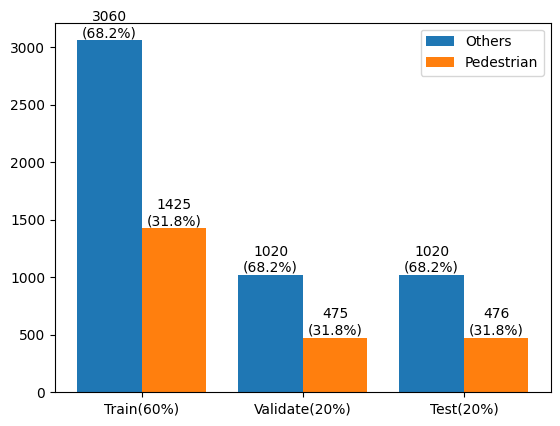

In [52]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

X = df_preprocess['Lidar_Points']
y = df_preprocess['label']

X_List = list()
for points in X:
    X_List.append(points)

X_train, X_test, y_train, y_test = train_test_split(X_List, y, test_size=0.4, shuffle=True, stratify=y)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, stratify=y_test)

# Calculate the total counts for each variable
total_counts = [len(y_train), len(y_validate), len(y_test)]

# Calculate the counts for 'Others' and 'Pedestrian' classes for each variable
others_counts = [y_train.tolist().count(0), y_validate.tolist().count(0), y_test.tolist().count(0)]
pedestrian_counts = [y_train.tolist().count(1), y_validate.tolist().count(1), y_test.tolist().count(1)]

# Calculate the percentages for 'Others' and 'Pedestrian' classes for each variable
percentage_others = [count / total_counts[i] * 100 for i, count in enumerate(others_counts)]
percentage_pedestrian = [count / total_counts[i] * 100 for i, count in enumerate(pedestrian_counts)]

# Define Data for the bar chart
team = ['Train(60%)', 'Validate(20%)', 'Test(20%)']

x_axis = np.arange(len(team))

# Multi bar Chart
plt.bar(x_axis - 0.2, others_counts, width=0.4, label='Others')
plt.bar(x_axis + 0.2, pedestrian_counts, width=0.4, label='Pedestrian')

# Add numbers and percentages on each bar
for i, v in enumerate(others_counts):
    plt.text(i - 0.2, v + 1, f"{v}\n({percentage_others[i]:.1f}%)", color='black', ha='center', va='bottom')

for i, v in enumerate(pedestrian_counts):
    plt.text(i + 0.2, v + 1, f"{v}\n({percentage_pedestrian[i]:.1f}%)", color='black', ha='center', va='bottom')

# Xticks
plt.xticks(x_axis, team)

# Add legend
plt.legend()

# Display
plt.show()


In [53]:
import matplotlib.pyplot as plt

# Sample data
x_values = [2, 4, 8, 16]
y_values1 = [6667, 5100, 3383, 2094]
y_values2 = [3447, 2376, 1323, 801]

# Create a line plot with connected points for the first set of data
plt.plot(x_values, y_values1, marker='o', linestyle='-', color='b', label='Others')

# Create another line plot with connected points for the second set of data
plt.plot(x_values, y_values2, marker='o', linestyle='-', color='r', label='Pedestrian')

# Add labels and title
plt.xlabel('Min Number of LiDAR Points')
plt.ylabel('Number of objects')
plt.legend()

# Set custom x-axis ticks
plt.xticks(x_values)

# Show the plot
plt.show()


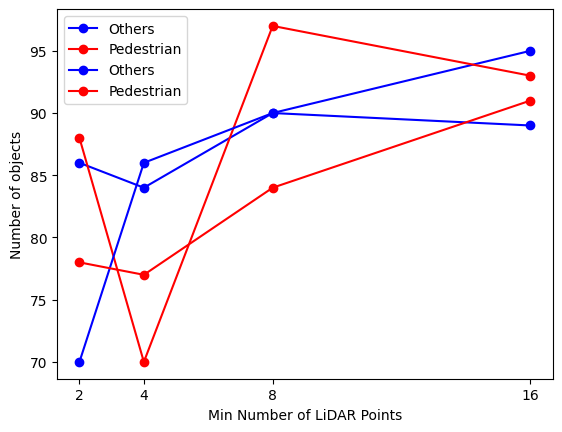

In [54]:
import matplotlib.pyplot as plt

# Sample data
x_values = [2, 4, 8, 16]
y_values1 = [86, 84, 90, 95]
y_values2 = [88, 70, 97, 93]
y_values3 = [70, 86, 90, 89]
y_values4 = [78, 77, 84, 91]

# Create a line plot with connected points for the first set of data
plt.plot(x_values, y_values1, marker='o', linestyle='-', color='b', label='Others')

# Create another line plot with connected points for the second set of data
plt.plot(x_values, y_values2, marker='o', linestyle='-', color='r', label='Pedestrian')

plt.plot(x_values, y_values3, marker='o', linestyle='-', color='b', label='Others')

# Create another line plot with connected points for the second set of data
plt.plot(x_values, y_values4, marker='o', linestyle='-', color='r', label='Pedestrian')

# Add labels and title
plt.xlabel('Min Number of LiDAR Points')
plt.ylabel('Number of objects')
plt.legend()

# Set custom x-axis ticks
plt.xticks(x_values)

# Show the plot
plt.show()
